In [1]:
from requests import Request , Session
from requests.exceptions import ConnectionError , Timeout , TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
# Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url , params = parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError , Timeout , TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


# This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [5]:
# This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12480,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995044e+07,1.995044e+07,False,NaN,1,NaN,NaN,None,2025-11-18T19:28:00.000Z,93413.569335,1.160285e+11,33.3191,0.127310,1.518840,-9.624313,-14.447596,-19.060721,-18.138909,1.863642e+12,58.3032,1.961685e+12,None,2025-11-18T19:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:30:59.368285
1,1027,Ethereum,ETH,ethereum,11177,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206961e+08,1.206961e+08,True,NaN,2,NaN,NaN,None,2025-11-18T19:28:00.000Z,3159.302087,4.836779e+10,29.2979,0.491131,5.053383,-8.830288,-20.858677,-29.271112,-27.022390,3.813156e+11,11.9331,3.813156e+11,None,2025-11-18T19:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:30:59.368285
2,825,Tether USDt,USDT,tether,158993,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.840306e+11,1.869075e+11,True,NaN,3,NaN,NaN,None,2025-11-18T19:28:00.000Z,0.999507,1.780411e+11,21.0992,-0.018542,0.082904,-0.048736,-0.101990,-0.092507,-0.063000,1.839397e+11,5.7545,1.868153e+11,None,2025-11-18T19:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-18 22:30:59.368285
3,52,XRP,XRP,xrp,1761,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.017900e+10,9.998576e+10,False,NaN,4,NaN,NaN,None,2025-11-18T19:28:00.000Z,2.235277,6.499832e+09,15.6822,0.460923,4.609848,-7.797702,-6.901905,-25.704855,-24.323492,1.345167e+11,4.2091,2.235277e+11,None,2025-11-18T19:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:30:59.368285
4,1839,BNB,BNB,bnb,2971,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377369e+08,1.377369e+08,1.377369e+08,False,NaN,5,NaN,NaN,None,2025-11-18T19:28:00.000Z,937.186662,4.049162e+09,15.6164,0.086489,3.838977,-2.973999,-16.265017,-4.401159,8.204777,1.290851e+11,4.0385,1.290851e+11,None,2025-11-18T19:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:30:59.368285
5,5426,Solana,SOL,solana,1051,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.542710e+08,6.142392e+08,True,NaN,6,5.252369e+08,7.441255e+10,None,2025-11-18T19:28:00.000Z,141.674270,8.117623e+09,17.8134,0.546557,8.950527,-10.585958,-25.063397,-40.422609,-23.636994,7.852594e+10,2.4571,8.702189e+10,None,2025-11-18T19:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:30:59.368285
6,3408,USDC,USDC,usd-coin,34647,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.475498e+10,7.475498e+10,False,NaN,7,6.090122e+10,6.089318e+10,None,2025-11-18T19:28:00.000Z,0.999868,2.258935e+10,23.9136,-0.040907,0.012972,-0.018516,-0.017229,-0.000211,-0.006880,7.474511e+10,2.3388,7.474511e+10,None,2025-11-18T19:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-18 22:30:59.368285
7,1958,TRON,TRX,tron,1260,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467187e+10,9.467187e+10,True,NaN,8,9.466789e+10,2.771408e+10,None,2025-11-18T19:29:00.000Z,0.292751,1.142686e+09,23.3318,0.205714,0.240620,-2.095278,-8.674174,-15.094451,-16.882233,2.771524e+10,0.8672,2.771524e+10,None,2025-11-18T19:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:30:59.368285
8,74,Dogecoin,DOGE,dogecoin,1350,2013-12-15T00:00:00

In [7]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url , params = parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError , Timeout , TooManyRedirects) as e:
      print(e)

# NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Mohammad Obeidat\Documents\Course Data Analyst\PYTHON\API.csv'):
        df.to_csv(r'C:\Users\Mohammad Obeidat\Documents\Course Data Analyst\PYTHON\API.csv' , header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Mohammad Obeidat\Documents\Course Data Analyst\PYTHON\API.csv' , mode = 'a', header = False)
        
    # Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [8]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [9]:
df72 = pd.read_csv(r'C:\Users\Mohammad Obeidat\Documents\Course Data Analyst\PYTHON\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12480,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.995044e+07,1.995044e+07,False,NaN,1,NaN,NaN,NaN,2025-11-18T19:31:00.000Z,93404.577423,1.155990e+11,35.7041,0.215720,1.415804,-9.677771,-14.415066,-19.025097,-18.142244,1.863462e+12,58.3015,1.961496e+12,NaN,2025-11-18T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:32:50.639574
1,1,1027,Ethereum,ETH,ethereum,11177,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206961e+08,1.206961e+08,True,NaN,2,NaN,NaN,NaN,2025-11-18T19:31:00.000Z,3159.416039,4.820514e+10,28.8048,0.511546,5.097663,-8.883861,-20.874806,-29.229884,-27.095464,3.813293e+11,11.9335,3.813293e+11,NaN,2025-11-18T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:32:50.639574
2,2,825,Tether USDt,USDT,tether,158993,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.840306e+11,1.869075e+11,True,NaN,3,NaN,NaN,NaN,2025-11-18T19:31:00.000Z,0.999512,1.775023e+11,21.2684,0.003818,0.054364,-0.047995,-0.110528,-0.104237,-0.047662,1.839408e+11,5.7549,1.868163e+11,NaN,2025-11-18T19:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-18 22:32:50.639574
3,3,52,XRP,XRP,xrp,1761,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.017900e+10,9.998576e+10,False,NaN,4,NaN,NaN,NaN,2025-11-18T19:31:00.000Z,2.234865,6.488471e+09,15.2584,0.437548,4.477494,-7.973388,-6.926991,-25.686936,-24.343267,1.344919e+11,4.2083,2.234865e+11,NaN,2025-11-18T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:32:50.639574
4,4,1839,BNB,BNB,bnb,2971,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377369e+08,1.377369e+08,1.377369e+08,False,NaN,5,NaN,NaN,NaN,2025-11-18T19:31:00.000Z,937.170444,4.044255e+09,15.3811,0.156954,3.784185,-3.043642,-16.181736,-4.436918,8.031311,1.290829e+11,4.0387,1.290829e+11,NaN,2025-11-18T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:32:50.639574
5,5,5426,Solana,SOL,solana,1051,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.542710e+08,6.142392e+08,True,NaN,6,5.252369e+08,7.443387e+10,NaN,2025-11-18T19:31:00.000Z,141.714864,8.109407e+09,17.5063,0.604176,8.812146,-10.646500,-25.097667,-40.414587,-23.638705,7.854844e+10,2.4578,8.704683e+10,NaN,2025-11-18T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:32:50.639574
6,6,3408,USDC,USDC,usd-coin,34647,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.475498e+10,7.475498e+10,False,NaN,7,6.090122e+10,6.089625e+10,NaN,2025-11-18T19:31:00.000Z,0.999918,2.249001e+10,22.6881,0.006079,0.015872,-0.021189,-0.024678,0.007989,0.008890,7.474888e+10,2.3389,7.474888e+10,NaN,2025-11-18T19:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-18 22:32:50.639574
7,7,1958,TRON,TRX,tron,1260,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.467187e+10,9.467187e+10,True,NaN,8,9.466789e+10,2.770907e+10,NaN,2025-11-18T19:32:00.000Z,0.292698,1.142262e+09,23.3820,0.204771,0.235070,-2.139242,-8.714916,-15.121711,-16.936566,2.771023e+10,0.8671,2.771023e+10,NaN,2025-11-18T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:32:50.639574
8,8,74,Dogecoin,DOGE,dogecoin,1350,2013-12-15

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12480,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995044e+07,1.995044e+07,False,NaN,1,NaN,NaN,None,2025-11-18T19:35:00.000Z,93221.513359,1.157939e+11,32.1094,-0.023169,1.209180,-9.726671,-14.417529,-19.156185,-18.251921,1.859810e+12,58.1982,1.957652e+12,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
1,1027,Ethereum,ETH,ethereum,11177,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206961e+08,1.206961e+08,True,NaN,2,NaN,NaN,None,2025-11-18T19:35:00.000Z,3150.668739,4.789518e+10,22.6992,0.024399,4.869017,-8.988657,-20.916560,-29.407254,-27.207649,3.802735e+11,11.8996,3.802735e+11,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
2,825,Tether USDt,USDT,tether,158993,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.840306e+11,1.869075e+11,True,NaN,3,NaN,NaN,None,2025-11-18T19:35:00.000Z,0.999439,1.769627e+11,18.3715,-0.002437,0.056767,-0.049057,-0.107971,-0.085190,-0.049643,1.839274e+11,5.7556,1.868027e+11,None,2025-11-18T19:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-18 22:36:55.114702
3,52,XRP,XRP,xrp,1761,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.017900e+10,9.998576e+10,False,NaN,4,NaN,NaN,None,2025-11-18T19:35:00.000Z,2.232295,6.467268e+09,14.6868,0.232893,4.738409,-8.096359,-6.953588,-25.719440,-24.507067,1.343373e+11,4.2034,2.232295e+11,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
4,1839,BNB,BNB,bnb,2971,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377369e+08,1.377369e+08,1.377369e+08,False,NaN,5,NaN,NaN,None,2025-11-18T19:36:00.000Z,936.211763,4.031037e+09,14.6853,0.043166,3.882195,-3.030034,-16.158075,-4.544599,7.868762,1.289509e+11,4.0348,1.289509e+11,None,2025-11-18T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
5,5426,Solana,SOL,solana,1051,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.542710e+08,6.142392e+08,True,NaN,6,5.252369e+08,7.436238e+10,None,2025-11-18T19:35:00.000Z,141.578738,8.080606e+09,16.7314,0.442349,9.015822,-10.731335,-25.118536,-40.433900,-23.804853,7.847299e+10,2.4554,8.696321e+10,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
6,3408,USDC,USDC,usd-coin,34647,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.475498e+10,7.475498e+10,False,NaN,7,6.090122e+10,6.088076e+10,None,2025-11-18T19:35:00.000Z,0.999664,2.238684e+10,21.3367,-0.019257,-0.001727,-0.026619,-0.032568,-0.006969,-0.015322,7.472986e+10,2.3382,7.472986e+10,None,2025-11-18T19:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-18 22:36:55.114702
7,1958,TRON,TRX,tron,1260,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467187e+10,9.467187e+10,True,NaN,8,9.466789e+10,2.770262e+10,None,2025-11-18T19:35:00.000Z,0.292630,1.135844e+09,22.3679,0.087412,0.373101,-2.150339,-8.723810,-15.128534,-17.034224,2.770378e+10,0.8677,2.770379e+10,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
8,74,Dogecoin,DOGE,dogecoin,1350,2013-12-15T00:00:

In [11]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12480,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19950440.00000,19950440.00000,False,NaN,1,NaN,NaN,None,2025-11-18T19:35:00.000Z,93221.51336,115793934911.69896,32.10940,-0.02317,1.20918,-9.72667,-14.41753,-19.15619,-18.25192,1859810208971.51953,58.19820,1957651780532.25000,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
1,1027,Ethereum,ETH,ethereum,11177,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120696138.18535,120696138.18535,True,NaN,2,NaN,NaN,None,2025-11-18T19:35:00.000Z,3150.66874,47895184999.01970,22.69920,0.02440,4.86902,-8.98866,-20.91656,-29.40725,-27.20765,380273549449.88281,11.89960,380273549449.88000,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
2,825,Tether USDt,USDT,tether,158993,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,184030561832.86996,186907505342.99124,True,NaN,3,NaN,NaN,None,2025-11-18T19:35:00.000Z,0.99944,176962678113.00427,18.37150,-0.00244,0.05677,-0.04906,-0.10797,-0.08519,-0.04964,183927391920.15298,5.75560,186802722578.54001,None,2025-11-18T19:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-18 22:36:55.114702
3,52,XRP,XRP,xrp,1761,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60179002978.00000,99985763151.00000,False,NaN,4,NaN,NaN,None,2025-11-18T19:35:00.000Z,2.23229,6467268417.93797,14.68680,0.23289,4.73841,-8.09636,-6.95359,-25.71944,-24.50707,134337267406.81766,4.20340,223229466689.45001,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
4,1839,BNB,BNB,bnb,2971,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137736852.66000,137736852.66000,137736852.66000,False,NaN,5,NaN,NaN,None,2025-11-18T19:36:00.000Z,936.21176,4031036666.69546,14.68530,0.04317,3.88219,-3.03003,-16.15808,-4.54460,7.86876,128950861670.56982,4.03480,128950861670.57001,None,2025-11-18T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
5,5426,Solana,SOL,solana,1051,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,554270983.20321,614239211.38163,True,NaN,6,525236893.30000,74362376724.91174,None,2025-11-18T19:35:00.000Z,141.57874,8080606470.65488,16.73140,0.44235,9.01582,-10.73133,-25.11854,-40.43390,-23.80485,78472986544.57285,2.45540,86963212635.34000,None,2025-11-18T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-18 22:36:55.114702
6,3408,USDC,USDC,usd-coin,34647,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,74754980038.48050,74754980038.48050,False,NaN,7,60901219650.23000,60880757231.23715,None,2025-11-18T19:35:00.000Z,0.99966,22386844534.77261,21.33670,-0.01926,-0.00173,-0.02662,-0.03257,-0.00697,-0.01532,74729862844.89825,2.33820,74729862844.89999,None,2025-11-18T19:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-18 22:36:55.114702
7,1958,TRON,TRX,tron,1260,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94671869989.94170,94671871578.56799,True,NaN,8,94667886298.42999,27702618794.82747,None,2025-11-18T19:35:00.000Z,0.29263,1135844480.36689,22.36790,0.08741,0.37310,-2.15034

In [13]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.02317,1.20918,-9.72667,-14.41753,-19.15619,-18.25192
Ethereum,0.02440,4.86902,-8.98866,-20.91656,-29.40725,-27.20765
Tether USDt,-0.00244,0.05677,-0.04906,-0.10797,-0.08519,-0.04964
XRP,0.23289,4.73841,-8.09636,-6.95359,-25.71944,-24.50707
BNB,0.04317,3.88219,-3.03003,-16.15808,-4.54460,7.86876
Solana,0.44235,9.01582,-10.73133,-25.11854,-40.43390,-23.80485
USDC,-0.01926,-0.00173,-0.02662,-0.03257,-0.00697,-0.01532
TRON,0.08741,0.37310,-2.15034,-8.72381,-15.12853,-17.03422
Dogecoin,0.61915,5.97869,-7.40529,-17.62687,-39.14171,-26.43880


In [14]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      -0.02317
              quote.USD.percent_change_24h      1.20918
              quote.USD.percent_change_7d      -9.72667
              quote.USD.percent_change_30d    -14.41753
              quote.USD.percent_change_60d    -19.15619
              quote.USD.percent_change_90d    -18.25192
Ethereum      quote.USD.percent_change_1h       0.02440
              quote.USD.percent_change_24h      4.86902
              quote.USD.percent_change_7d      -8.98866
              quote.USD.percent_change_30d    -20.91656
              quote.USD.percent_change_60d    -29.40725
              quote.USD.percent_change_90d    -27.20765
Tether USDt   quote.USD.percent_change_1h      -0.00244
              quote.USD.percent_change_24h      0.05677
              quote.USD.percent_change_7d      -0.04906
              quote.USD.percent_change_30d     -0.10797
              quote.USD.percent_change_60d     -0.08519
     

In [15]:
type(df4)

pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h    -0.02317
             quote.USD.percent_change_24h    1.20918
             quote.USD.percent_change_7d    -9.72667
             quote.USD.percent_change_30d  -14.41753
             quote.USD.percent_change_60d  -19.15619
             quote.USD.percent_change_90d  -18.25192
Ethereum     quote.USD.percent_change_1h     0.02440
             quote.USD.percent_change_24h    4.86902
             quote.USD.percent_change_7d    -8.98866
             quote.USD.percent_change_30d  -20.91656
             quote.USD.percent_change_60d  -29.40725
             quote.USD.percent_change_90d  -27.20765
Tether USDt  quote.USD.percent_change_1h    -0.00244
             quote.USD.percent_change_24h    0.05677
             quote.USD.percent_change_7d    -0.04906
             quote.USD.percent_change_30d   -0.10797
             quote.USD.percent_change_60d   -0.08519
             quote.USD.percent_change_90d   -0.04964
XRP          quote.USD.percent_change_1h     0.23289
             quote.USD.percent_change_24h    4.73841
             quote.USD.percent_change_7d    -8.09636
             quote.USD.percent_change_30d   -6.95359
             quote.USD.percent_change_60d  -25.71944
             quote.USD.percent_change_90d  -24.50707
BNB          quote.USD.percent_change_1h     0.04317
             quote.USD.percent_change_24h    3.88219
             quote.USD.percent_change_7d    -3.03003
             quote.USD.percent_change_30d  -16.15808
             quote.USD.percent_change_60d   -4.54460
             quote.USD.percent_change_90d    7.86876
Solana       quote.USD.percent_change_1h     0.44235
             quote.USD.percent_change_24h    9.01582
             quote.USD.percent_change_7d   -10.73133
             quote.USD.percent_change_30d  -25.11854
             quote.USD.percent_change_60d  -40.43390
             quote.USD.percent_change_90d  -23.80485
USDC         quote.USD.percent_change_1h    -0.01926
             quote.USD.percent_change_24h   -0.00173
             quote.USD.percent_change_7d    -0.02662
             quote.USD.percent_change_30d   -0.03257
             quote.USD.percent_change_60d   -0.00697
             quote.USD.percent_change_90d   -0.01532
TRON         quote.USD.percent_change_1h     0.08741
             quote.USD.percent_change_24h    0.37310
             quote.USD.percent_change_7d    -2.15034
             quote.USD.percent_change_30d   -8.72381
             quote.USD.percent_change_60d  -15.12853
             quote.USD.percent_change_90d  -17.03422
Dogecoin     quote.USD.percent_change_1h     0.61915
             quote.USD.percent_change_24h    5.97869
             quote.USD.percent_change_7d    -7.40529
             quote.USD.percent_change_30d  -17.62687
             quote.USD.percent_change_60d  -39.14171
             quote.USD.percent_change_90d  -26.43880
Cardano      quote.USD.percent_change_1h    -0.00574
             quote.USD.percent_change_24h    3.58473
             quote.USD.percent_change_7d   -15.15183
             quote.USD.percent_change_30d  -27.17601
             quote.USD.percent_change_60d  -46.58625
             quote.USD.percent_change_90d  -45.93087
Hyperliquid  quote.USD.percent_change_1h    -0.40986
             quote.USD.percent_change_24h    2.97594
             quote.USD.percent_change_7d    -2.28944
             quote.USD.percent_change_30d    1.25823
             quote.USD.percent_change_60d  -31.28815
             quote.USD.percent_change_90d   -9.40204
Bitcoin Cash quote.USD.percent_change_1h     0.81362
             quote.USD.percent_change_24h    5.87444
             quote.USD.percent_change_7d     3.62238
             quote.USD.percent_change_30d   11.49620
             quote.USD.percent_change_60d  -12.61359
             quote.USD.percent_change_90d   -5.84446
Zcash        quote.USD.percent_change_1h     0.73891
             quote.USD.percent_change_24h    1.70188
             quote

In [17]:
df5.count()

values    90
dtype: int64

In [18]:
# Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
# So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02317
1,Bitcoin,quote.USD.percent_change_24h,1.20918
2,Bitcoin,quote.USD.percent_change_7d,-9.72667
3,Bitcoin,quote.USD.percent_change_30d,-14.41753
4,Bitcoin,quote.USD.percent_change_60d,-19.15619
5,Bitcoin,quote.USD.percent_change_90d,-18.25192
6,Ethereum,quote.USD.percent_change_1h,0.02440
7,Ethereum,quote.USD.percent_change_24h,4.86902
8,Ethereum,quote.USD.percent_change_7d,-8.98866
9,Ethereum,quote.USD.percent_change_30d,-20.91656


In [19]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02317
1,Bitcoin,quote.USD.percent_change_24h,1.20918
2,Bitcoin,quote.USD.percent_change_7d,-9.72667
3,Bitcoin,quote.USD.percent_change_30d,-14.41753
4,Bitcoin,quote.USD.percent_change_60d,-19.15619
5,Bitcoin,quote.USD.percent_change_90d,-18.25192
6,Ethereum,quote.USD.percent_change_1h,0.02440
7,Ethereum,quote.USD.percent_change_24h,4.86902
8,Ethereum,quote.USD.percent_change_7d,-8.98866
9,Ethereum,quote.USD.percent_change_30d,-20.91656


In [21]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.02317
1,Bitcoin,24h,1.20918
2,Bitcoin,7d,-9.72667
3,Bitcoin,30d,-14.41753
4,Bitcoin,60d,-19.15619
5,Bitcoin,90d,-18.25192
6,Ethereum,1h,0.02440
7,Ethereum,24h,4.86902
8,Ethereum,7d,-8.98866
9,Ethereum,30d,-20.91656


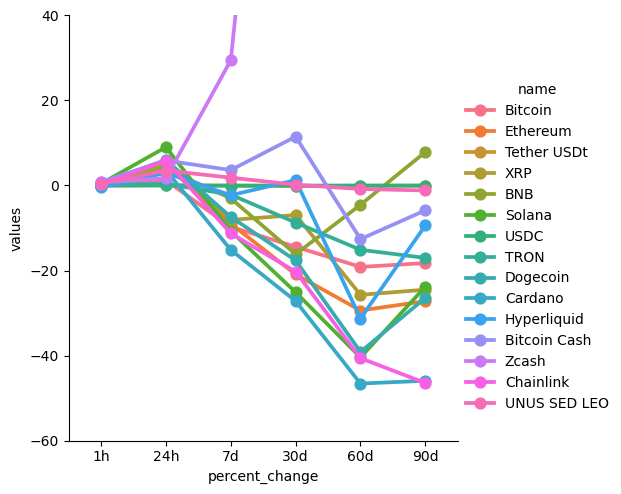

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change' , y = 'values' , hue = 'name' , data = df7 , kind = 'point')

plt.ylim(-60 , 40)
plt.show()

In [24]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,93221.51336,2025-11-18 22:36:55.114702


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

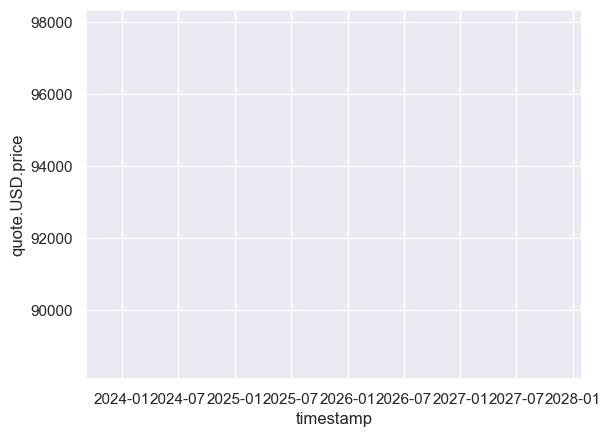

In [25]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x = 'timestamp' , y = 'quote.USD.price' , data = df10)